<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 17 **
** ┗ Mart offline purchase prediction **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Sales Trend Analysis」
* 🥈Session 2 -「Analysis of sales impact by variable」
* 🥇SESSION 3 -「Prediction of ML Use Purchases」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/17_Offline Retail Purchase Prediction')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/17_Offline Retail Purchase Prediction'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🧮🔍 (marketer, service planner, service operator, store operating manager)

``
Mart A is suffering from manpower due to operations in 52 hours a week.Since the sales volume per week cannot be predicted, the work schedule and manpower operation efficiently
It's hard to do.Since it is not a large company mart, it is impossible to collect detailed data such as the number of visitors and the number of parking.
In order to operate efficient manpower, we will use the data that can be easily obtained with public data and the data that can be easily obtained.
``


> ** Looking at the data **

* Marketing campaign related data
* Data specification ⬇

| Store | date | Weekly_sales | Holiday_flag | Temperature | fuel_price | CPI | Unemployment |
| ----: | ---: | ----: |: ---: | ---: | ---: ---: ---: ----: |
| Store ID | Date | Weekly sales volume | Public holidays | Temperature | Fuel price | Consumer price index | Unemployment rate |




In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter17_offline_mart.csv')
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Increases operating costs due to inefficiency of manpower operation
``

> ** Expected effect **

``
▶ Reduction of operating costs due to efficiency of manpower operation
``

> ** Solution **

``
▶ Adjustment of manpower operation schedule through weekly sales forecasting
▶ Session 1 🥉
-Data pretreatment and sales trend (Trend) DATA search
▶ Session 2 🥈
-Correlation with sales volume through Lint Plot and Heat Map
▶ Session 3 🥇
-Recondition of weekly sales using ML algorithms
``

> ** Performance measurement **

``
▶ Monitoring costs after adjusting schedules according to weekly sales volume forecast
``

> ** Public application **

``
▶ When a week ends, public data and internal data collection to predict borrowers' sales volume
▶ Inputs the data to Model and extracts weekly sales volume
▶ Establishment of manpower operation plan according to weekly sales volume
``

> ** Main code preview **

``
▶ Session 1 → PD.TO_DATETIME (), Unique (), PD.DataFrame ()
▶ Session 2 → Twinx ()
▶ Session 3 → Mean_absolute_error, R2_SCORE, Polynomialfeatures
``


## ** 🥉Session 1 **
** ┗ Sales trend analysis **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ It consists of 6,435 row, 8 cola
print('df', df.shape)

df (6435, 8)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
# ▶ Outlier verification
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# ▶ Fahrenheit Temperature> Sub Celsius Temperature Conversion
df['Temperature']= (df['Temperature']-32) / 1.8
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,8.055556,2.625,211.350143,8.106


In [ ]:
df['Temperature'].describe()

,Temperature
count,6435.000000
mean,15.924324
std,10.247185
min,-18.922222
25%,8.588889
50%,17.038889
75%,23.855556
max,37.855556


In [ ]:
# ▶ Data Time Change
import datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # Specify the correct format

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### · Sales trend analysis
---



In [ ]:
# ▶ Total 45 Store
len(df['Store'].unique())

45

In [ ]:
df['Store'].nunique()

45

In [ ]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106


In [ ]:
# ▶ Sorting ascending as a date based on the date
df = df.sort_values(by=['Date'])
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1287,10,2010-02-05,2193048.75,0,12.411111,2.962,126.442065,9.765
5148,37,2010-02-05,536006.73,0,7.761111,2.572,209.852966,8.554
2288,17,2010-02-05,789036.02,0,-4.938889,2.666,126.442065,6.548
4147,30,2010-02-05,465108.52,0,3.916667,2.572,210.752605,8.324


In [ ]:
df['Date'].min(), df['Date'].max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [ ]:
# ▶ STORE DF 1
df1 = df[df['Store']==1].sort_values(by=['Date'])
df1.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,14.327778,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,12.544444,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,10.805556,2.732,211.018042,8.106
8,1,2010-04-02,1594968.28,0,16.816667,2.719,210.820450,7.808
9,1,2010-04-09,1545418.53,0,18.811111,2.770,210.622857,7.808


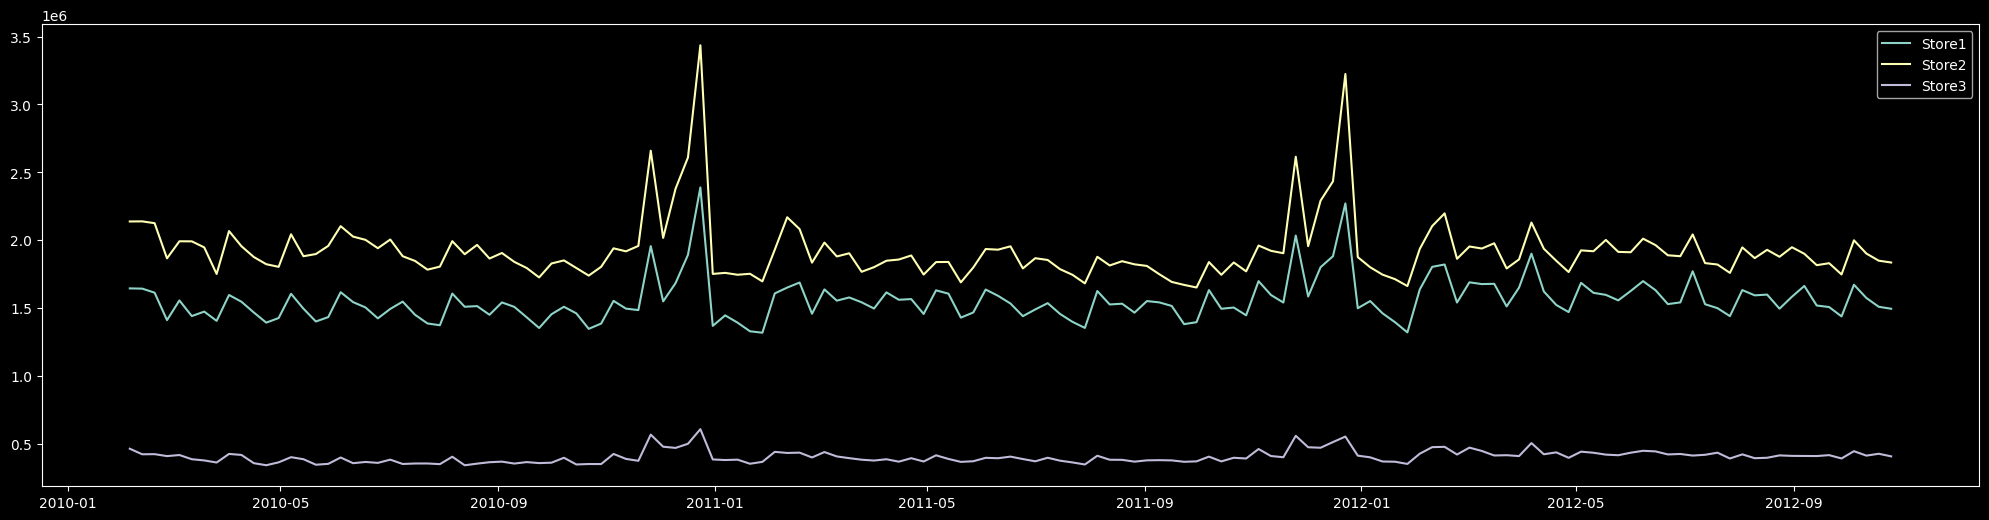

In [ ]:
# ▶ Since there is a difference in the level of sales volume by STORE, it is necessary to create an independent model.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df1['Date'], df1['Weekly_Sales'], label='Store1');
plt.gcf().set_size_inches(25, 6)

df2 = df[df['Store']==2].sort_values(by=['Date'])
plt.plot(df2['Date'], df2['Weekly_Sales'], label='Store2');
plt.gcf().set_size_inches(25, 6)

df3 = df[df['Store']==3].sort_values(by=['Date'])
plt.plot(df3['Date'], df3['Weekly_Sales'], label='Store3');
plt.gcf().set_size_inches(25, 6)

plt.legend()

In [ ]:
# ▶ Store1 and Store2 are similar weekly sales, but Store 3 has a different sales level.
df_concat = pd.DataFrame({'Date' : list(df1['Date']) ,
                          'Store1_sales': list(df1['Weekly_Sales']),
                          'Store2_sales': list(df2['Weekly_Sales']),
                          'Store3_sales': list(df3['Weekly_Sales'])})
df_concat

,Date,Store1_sales,Store2_sales,Store3_sales
0,2010-02-05,1643690.90,2136989.46,461622.22
1,2010-02-12,1641957.44,2137809.50,420728.96
2,2010-02-19,1611968.17,2124451.54,421642.19
3,2010-02-26,1409727.59,1865097.27,407204.86
4,2010-03-05,1554806.68,1991013.13,415202.04
...,...,...,...,...
138,2012-09-28,1437059.26,1746470.56,389813.02
139,2012-10-05,1670785.97,1998321.04,443557.65
140,2012-10-12,1573072.81,1900745.13,410804.39
141,2012-10-19,1508068.77,1847990.41,424513.08


## ** 🥈Session 2 **
** ┗ Analysis of sales impacts by variable **
---


### · Line Plot -Analysis of correlation
---


In [ ]:
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106


In [ ]:
# ▶ Holiday
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

,Weekly_Sales
Holiday_Flag,
0,1.041256e+06
1,1.122888e+06


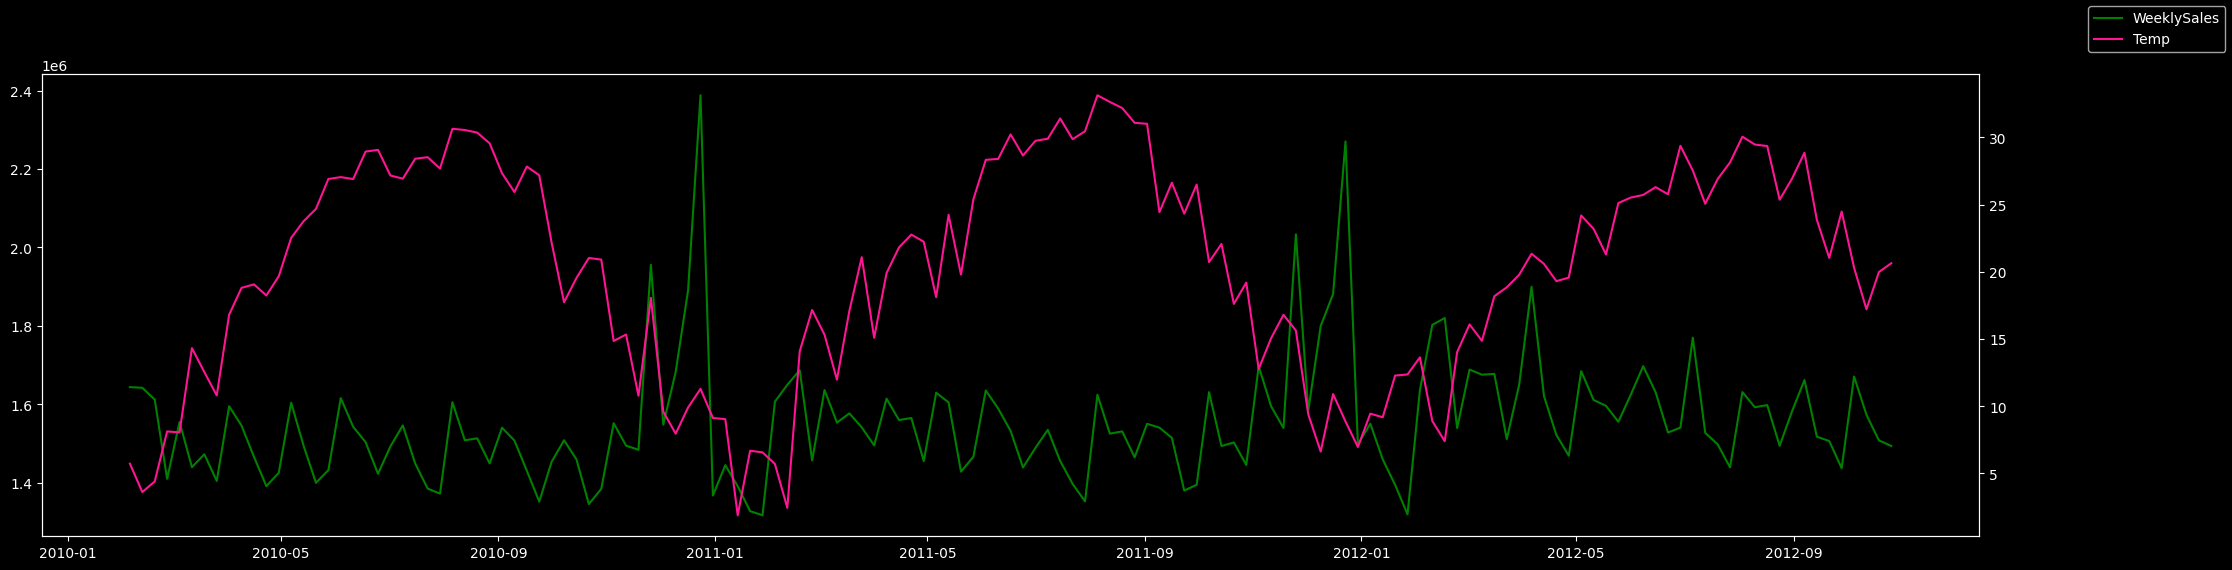

In [ ]:
# ▶ Temperature, weekly sales volume, and temperature rises, and sales volume increases when the temperature decreases
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Temperature'], color='deeppink', label='Temp')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()


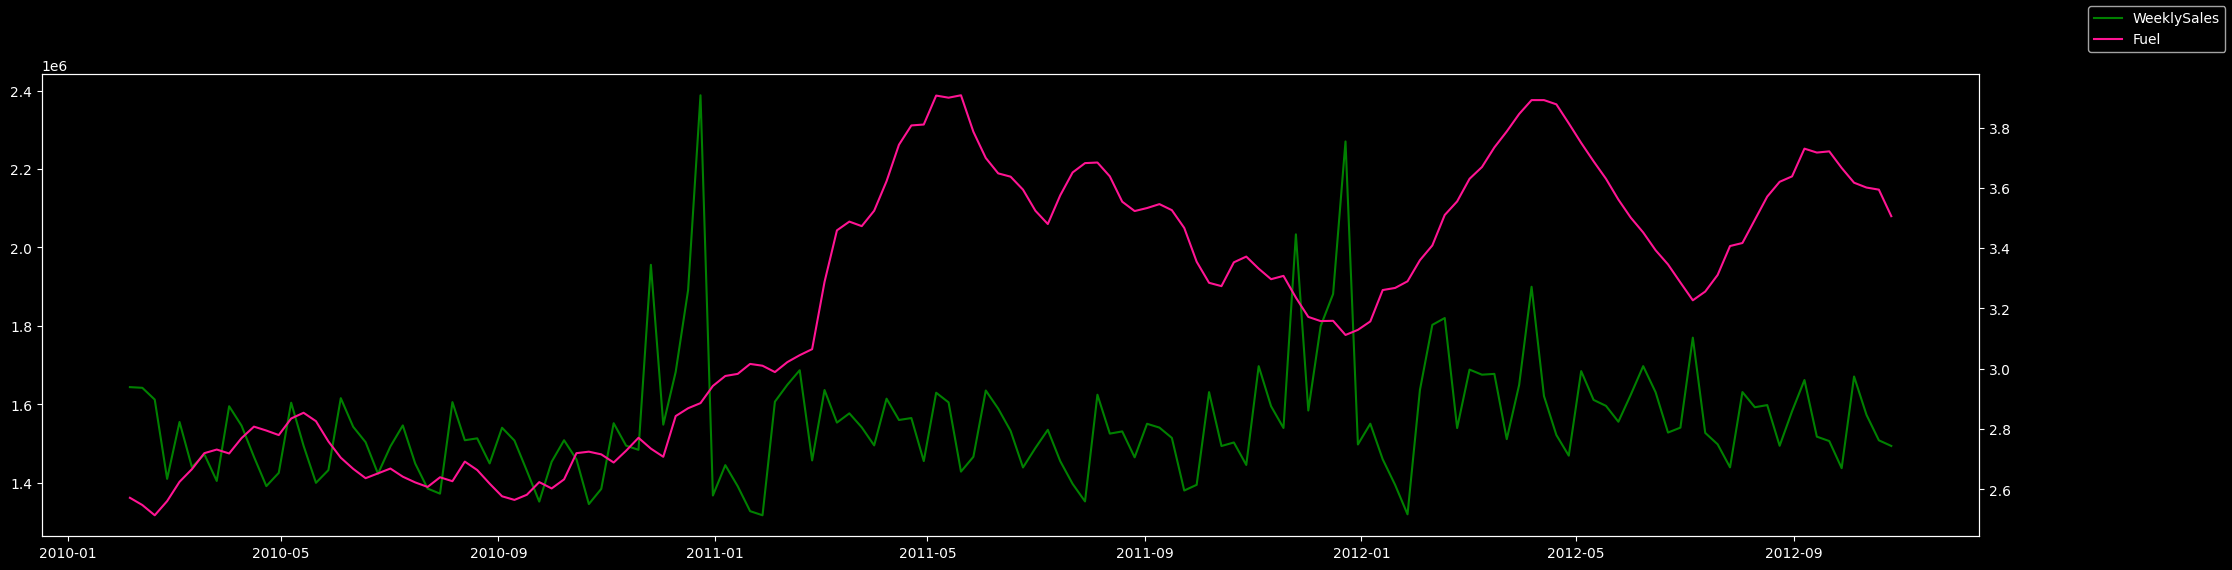

In [ ]:
# ▶ Fuel price and weekly sales volume
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label= 'WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Fuel_Price'], color='deeppink', label='Fuel')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

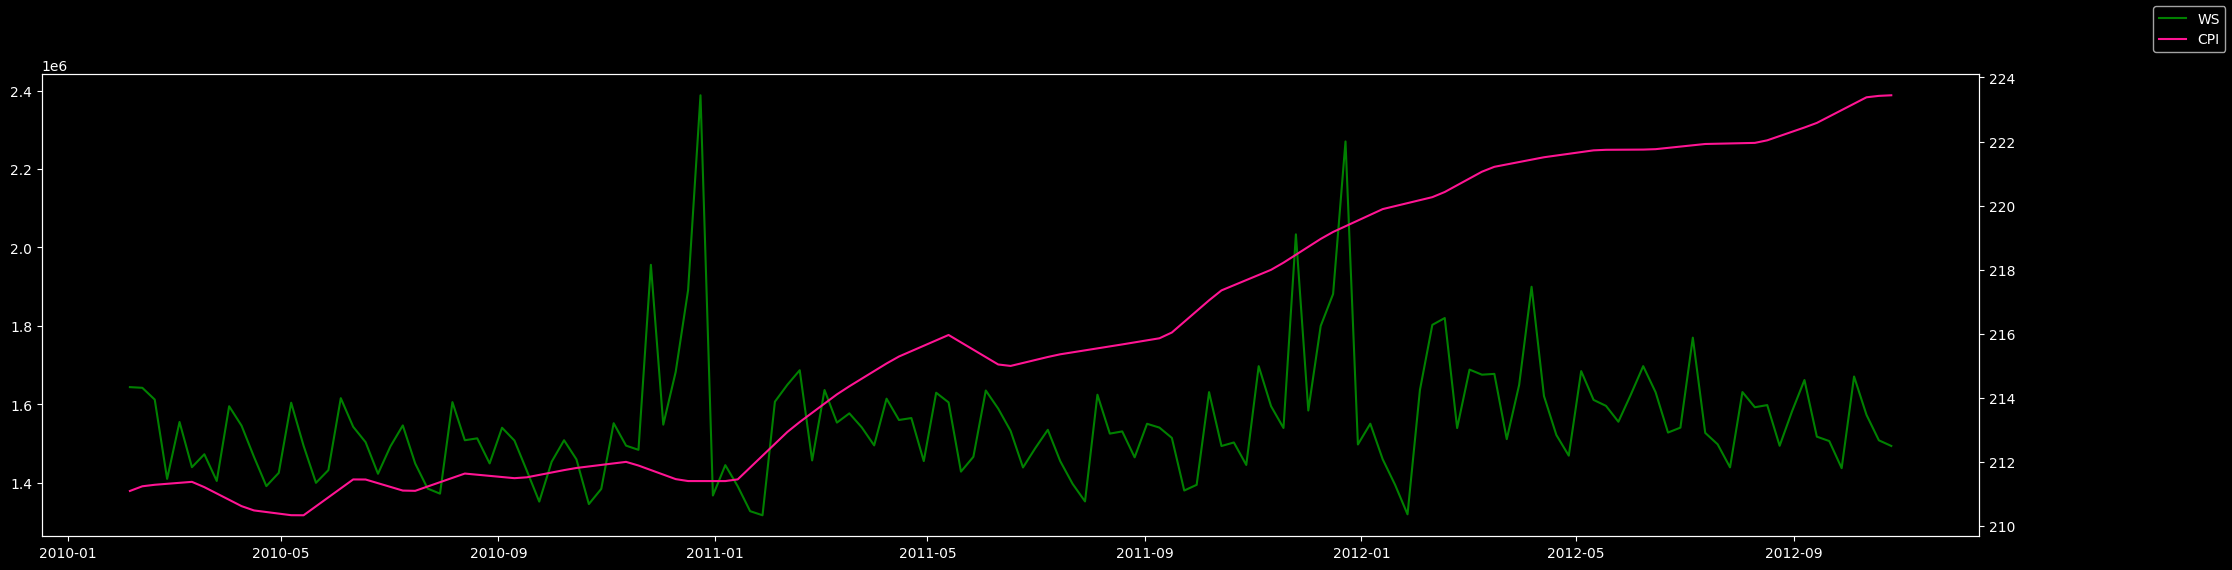

In [ ]:
# ▶ CPI and weekly sales volume
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WS')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['CPI'], color='deeppink', label='CPI')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

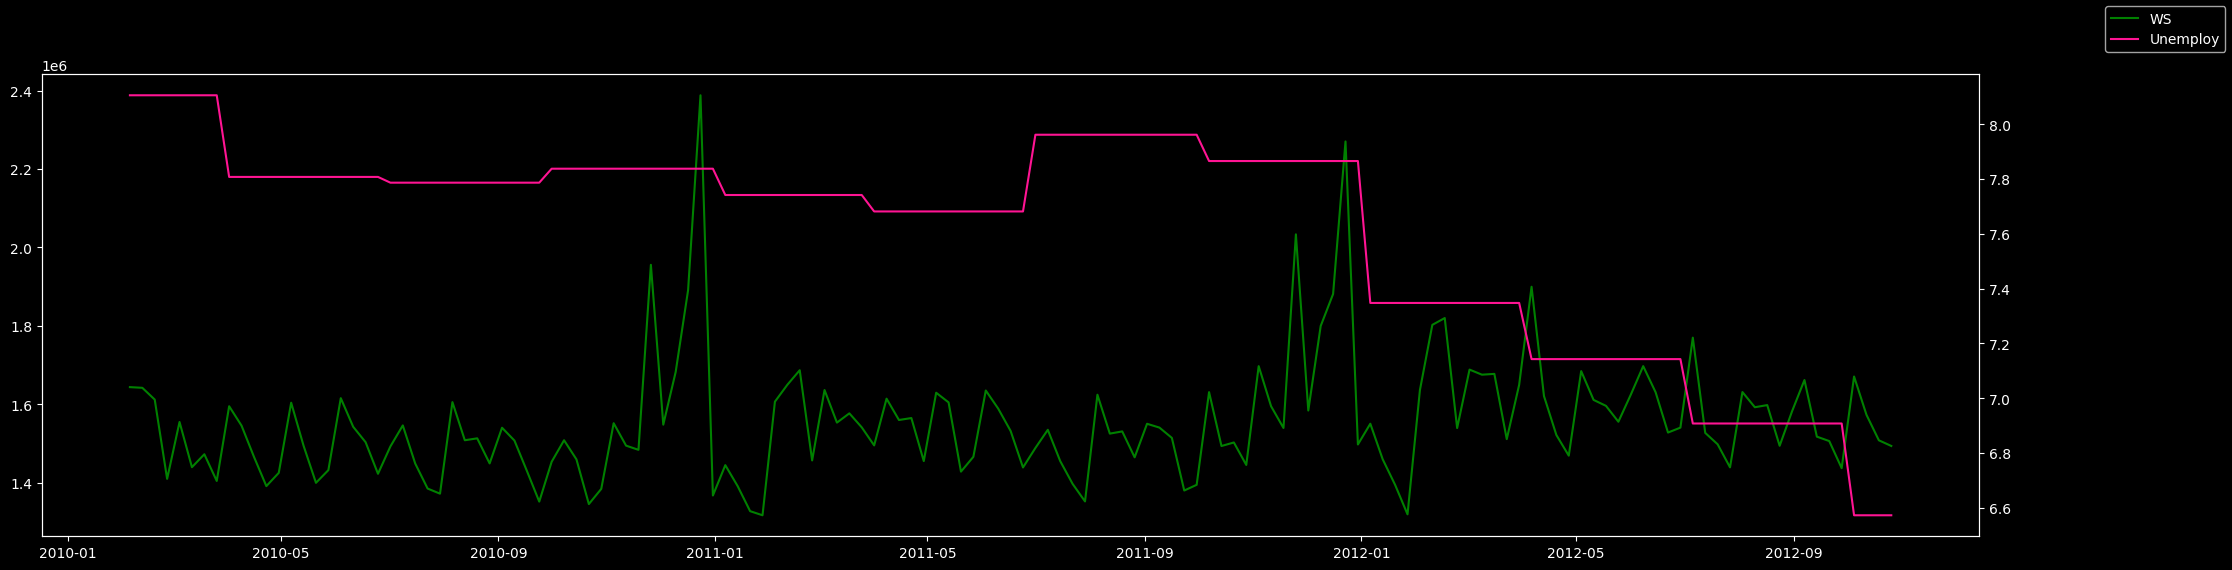

In [ ]:
# ▶ Unemployment rate and weekly sales volume
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WS')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Unemployment'], color='deeppink',label='Unemploy')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

### · Heat Map -Correlation Analysis
---



In [ ]:
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106


In [ ]:
df_corr = df1.drop(['Store', 'Holiday_Flag', 'Date'], axis=1)
df_corr.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.222701,0.124592,0.225408,-0.097955
Temperature,-0.222701,1.000000,0.228493,0.118503,-0.180695
Fuel_Price,0.124592,0.228493,1.000000,0.755259,-0.513944
CPI,0.225408,0.118503,0.755259,1.000000,-0.813471
Unemployment,-0.097955,-0.180695,-0.513944,-0.813471,1.000000


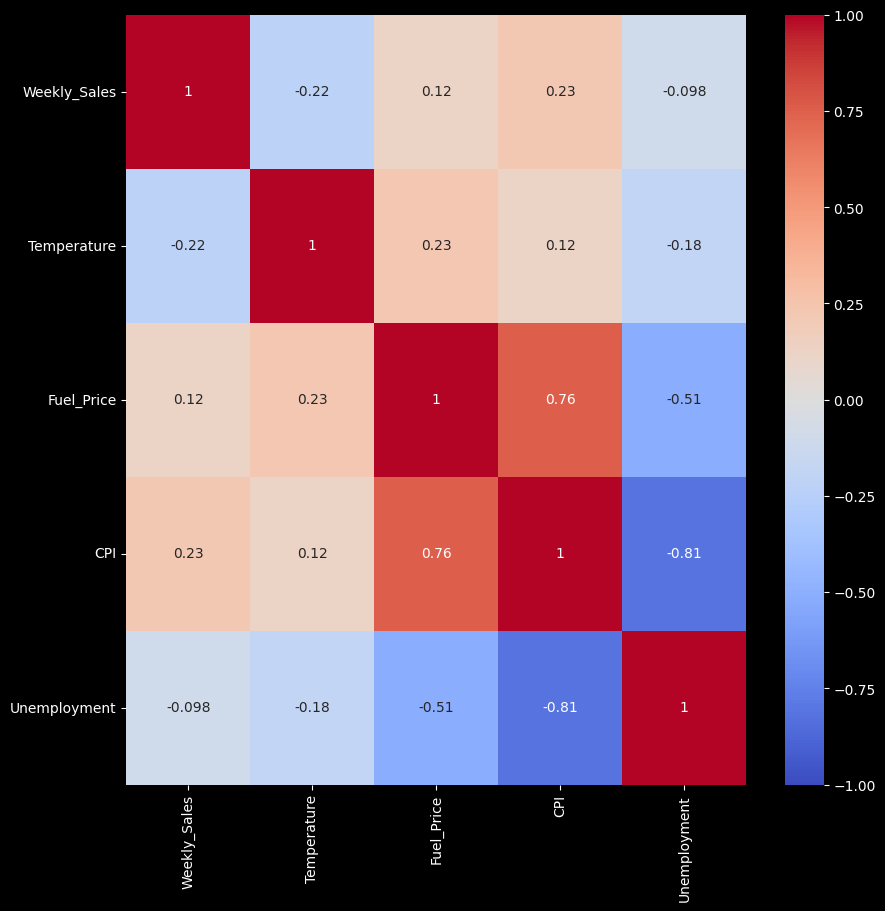

In [ ]:
# ▶ Except for continuous variables, HEAT MAP analysis
df_corr = df1.drop(['Store', 'Holiday_Flag', 'Date'], axis=1)

sns.heatmap(df_corr.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(10, 10)

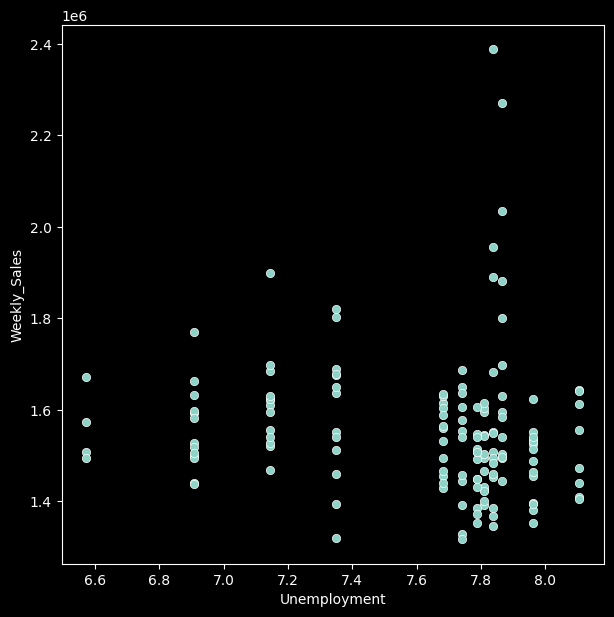

In [ ]:
# ▶ Scatter Plot between UNEMPLOYMENT and weekly sales volume
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df1);
plt.gcf().set_size_inches(7, 7)

## ** 🥇Session 3 **
** ┗ ML Use Purchase Prediction **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106


In [ ]:
# ▶ Extract month and day from date data and use it as a new derivative variable
df1['Dayofweek'] = df1['Date'].dt.dayofweek
df1['month'] = df1['Date'].dt.month
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Dayofweek,month
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106,4,2
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106,4,2
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,4,2
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,4,2
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106,4,3


In [ ]:
len(df1)

143

In [ ]:
# ▶ Steps to distinguish between Fearue (x) and Y data for learning modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X=df1.drop(['Store', 'Date', 'Weekly_Sales', 'CPI'], axis=1)
Y=df1['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1239)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(85, 6)
(85,)
(58, 6)
(58,)


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
rfr = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=1239)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=500, random_state=1239)

In [ ]:
# ▶ Prediction
# ▶ Forecasts are predicted and evaluated for both data and test data used for learning (※ ※ determination)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  64893.74213161644
r2_score(r2):  0.6430500989188902

mae_test(mae):  95725.46992720911
r2_score(r2):  0.22772920123985674


In [ ]:
# ▶ Dynasty regression, performance is not good
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_poly = poly.fit_transform(x_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

X_test_poly = poly.transform(x_test)

y_pred_test = lin_reg.predict(X_test_poly)


mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)

r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_test(mae):  101443.77704378885
r2_score(r2):  0.16303378436940774


In [ ]:
# ▶ E10, change the number data
pd.options.display.float_format = '{:.2f}'.format

result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result.head(5)

,Real Values,Predicted Values,diff
142,1493659.74,1498839.65,-5179.91
43,1548033.78,1599718.27,-51684.49
29,1449142.92,1481750.63,-32607.71
21,1492418.14,1488577.63,3840.51
77,1352219.79,1464768.61,-112548.82


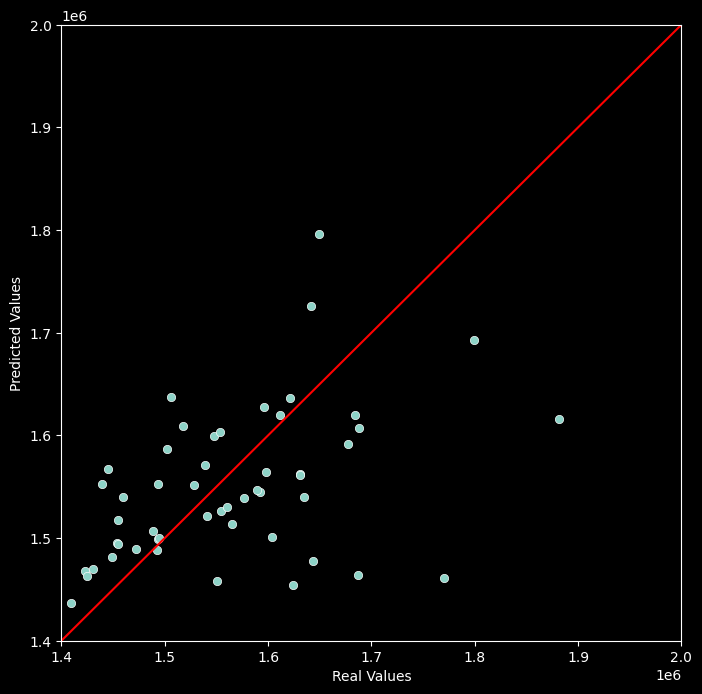

In [ ]:
# ▶ Adjust the XLIM and YLIM to check if linear fitting
sns.scatterplot(x='Real Values', y='Predicted Values', data=result) # Pass data as a DataFrame and specify x and y columns
plt.xlim(1400000, 2000000)
plt.ylim(1400000, 2000000)

x = [1400000, 2000000]
y = [1400000, 2000000]
plt.plot(x, y, color='red')

plt.gcf().set_size_inches(8 ,8)

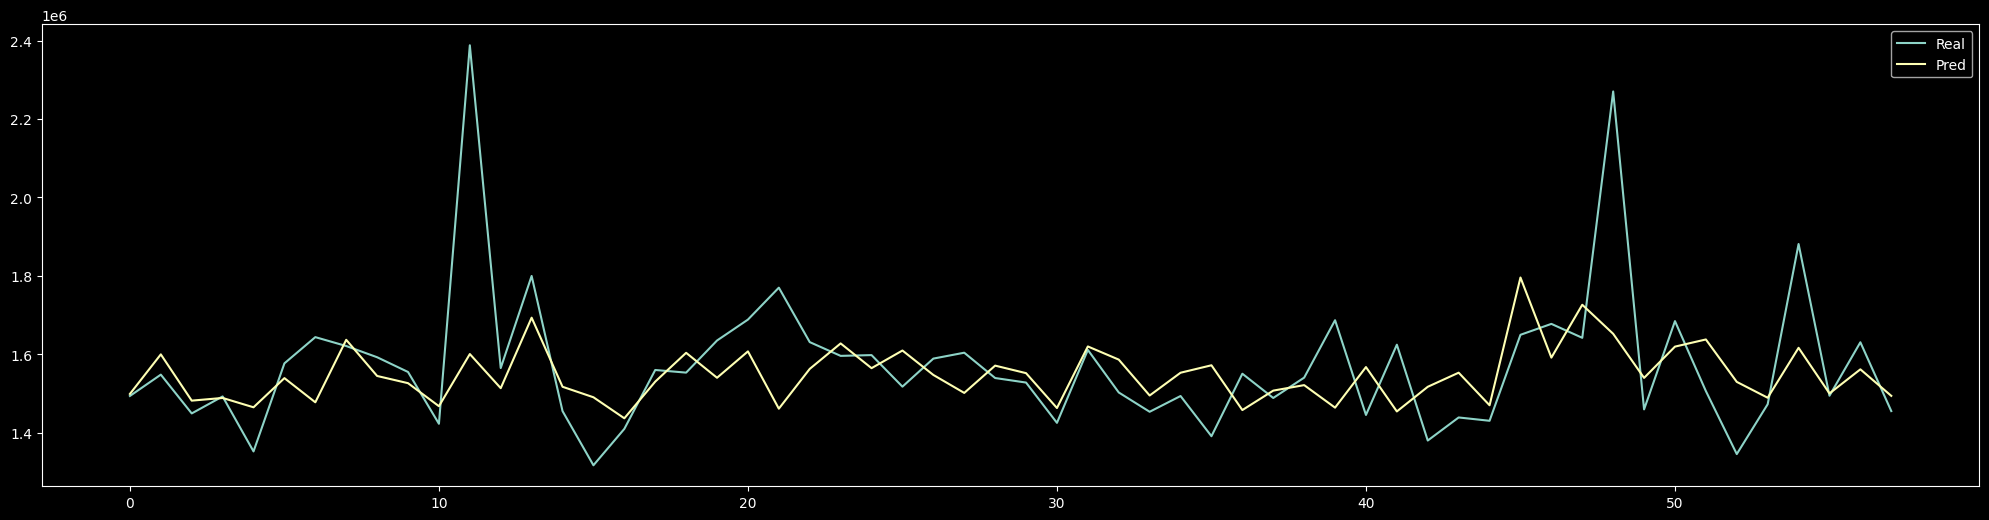

In [ ]:
# ▶ The actual value and the prediction value plotting, the peak cannot be matched
result = result.reset_index(drop=True)

plt.plot(result.index, result['Real Values'], label='Real');
plt.plot(result.index, result['Predicted Values'], label='Pred');
plt.legend()
plt.gcf().set_size_inches(25, 6)

### · Identify important variables
---
* Finding important variables through feature IMP analysis


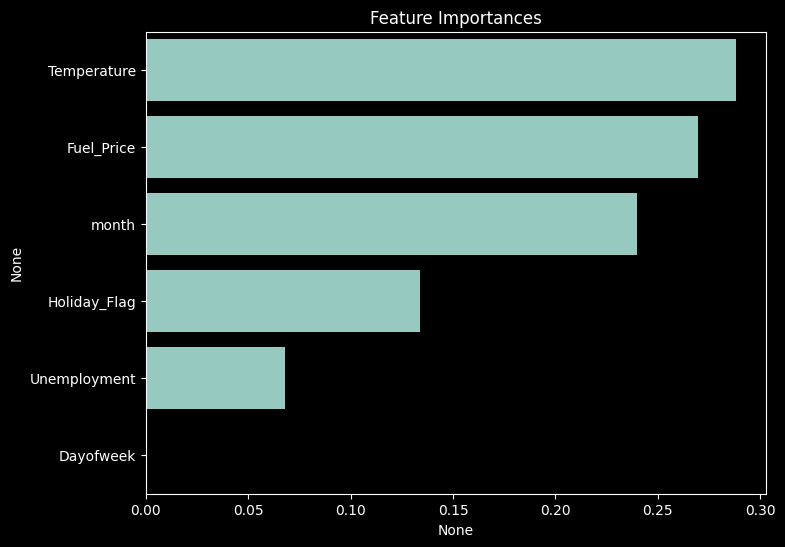

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [ ]:
df1.groupby('Dayofweek')['Weekly_Sales'].mean().sort_values(ascending=False)

,Weekly_Sales
Dayofweek,
4,1555264.40


### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(rfr)

# Model READ
rfr_from_pickle = pickle.loads(saved_model)